In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the NBA play by play data into a DataFrame
df = pd.read_csv('data/pbp2023.csv')
df_all = pd.read_csv('data/pbpALL.csv')

In [3]:
# Function to calculate points scored by each player in a given game
def points_scored_in_game(game_id):
    # Filter data for the given game_id
    game_df = df[df['gameid'] == game_id]

    # Initialize dictionaries to store points scored by each player
    player_points = {}
    
    # Initialize variables to keep track of running points for home and away teams
    running_h_pts = 0
    running_a_pts = 0
    
    # Iterate through each row in the filtered DataFrame
    for index, row in game_df.iterrows():
        # Get home and away points for the current row
        h_pts = row['h_pts']
        a_pts = row['a_pts']

        if pd.notna(h_pts) and pd.notna(a_pts) and pd.notnull(a_pts) and pd.notnull(h_pts):
            # Calculate points scored by each team in the current row
            points_scored_home = h_pts - running_h_pts
            points_scored_away = a_pts - running_a_pts
            
            # Update running points for home and away teams
            running_h_pts = h_pts
            running_a_pts = a_pts
        
            # Get player name and player id
            player_name = row['player']
            player_id = row['playerid']
            
            # Determine which team scored points
            if points_scored_home > 0:
                points_scored = points_scored_home
            else:
                points_scored = points_scored_away
                
                
                # Update points scored by the player
                if player_id in player_points:
                    player_points[player_id]['points'] += points_scored
                else:
                    player_points[player_id] = {'name': player_name, 'points': points_scored}
    return player_points

In [4]:
# Iterate through unique game IDs and calculate points scored by each player for each game
unique_game_ids = df['gameid'].unique()
all_player_points = {}

for game_id in unique_game_ids:
    points_scored = points_scored_in_game(game_id)
    all_player_points[game_id] = points_scored

# Print nicely formatted output
for game_id, player_points in all_player_points.items():
    print("Game ID:", game_id)
    for player_id, data in player_points.items():
        print("Player Name:", data['name'], "| Points Scored:", data['points'])
    print("\n")

Game ID: 22200001
Player Name: nan | Points Scored: 0.0
Player Name: T. Harris | Points Scored: 18.0
Player Name: J. Embiid | Points Scored: 26.0
Player Name: nan | Points Scored: 0.0
Player Name: J. Harden | Points Scored: 35.0
Player Name: T. Maxey | Points Scored: 21.0
Player Name: D. House Jr. | Points Scored: 1.0
Player Name: D. Melton | Points Scored: 5.0
Player Name: P. Tucker | Points Scored: 6.0
Player Name: M. Harrell | Points Scored: 2.0
Player Name: T. Porter | Points Scored: 0.0
Player Name: G. Niang | Points Scored: 3.0
Player Name: nan | Points Scored: 0.0


Game ID: 22200002
Player Name: nan | Points Scored: 0.0
Player Name: A. Davis | Points Scored: 27.0
Player Name: R. Westbrook | Points Scored: 19.0
Player Name: A. Reaves | Points Scored: 3.0
Player Name: L. Walker IV | Points Scored: 5.0
Player Name: L. James | Points Scored: 31.0
Player Name: K. Nunn | Points Scored: 13.0
Player Name: S. Burrell | Points Scored: 0.0
Player Name: M. Ryan | Points Scored: 3.0
Player 

In [5]:
# Function to calculate points scored by a specific player in each game
def points_scored_by_player(player_identifier):
    # Initialize a dictionary to store points scored by the player in each game
    player_points_by_game = {}

    # Initialize variables to keep track of running points for home and away teams
    running_h_pts = 0
    running_a_pts = 0
    
    # Iterate through each row in the filtered DataFrame
    for index, row in df.iterrows():
        # Get home and away points for the current row
        h_pts = row['h_pts']
        a_pts = row['a_pts']

        if pd.notna(h_pts) and pd.notna(a_pts) and pd.notnull(a_pts) and pd.notnull(h_pts):
            # Calculate points scored by each team in the current row
            points_scored_home = h_pts - running_h_pts
            points_scored_away = a_pts - running_a_pts
            
            # Update running points for home and away teams
            running_h_pts = h_pts
            running_a_pts = a_pts
        
            # Get player name and player id
            player_name = row['player']
            player_id = row['playerid']

            if player_identifier in (player_name, player_id):
                # Get game id
                game_id = row['gameid']
            
                # Determine which team scored points
                if points_scored_home > 0:
                    points_scored = points_scored_home
                else:
                    points_scored = points_scored_away
                
                # Update points scored by the player in the corresponding game
                if game_id in player_points_by_game:
                    player_points_by_game[game_id] += points_scored
                else:
                    player_points_by_game[game_id] = points_scored
            
    # Print the points scored by the player in each game
    for game_id, points_scored in player_points_by_game.items():
        print("Game ID:", game_id, "| Points Scored by", player_identifier, ":", points_scored)


In [6]:
# Example usage:
# Specify the player's name or ID as input
player_identifier = 'J. Tatum'
points_scored_by_player(player_identifier)

Game ID: 22200001 | Points Scored by J. Tatum : 35.0
Game ID: 22200022 | Points Scored by J. Tatum : 29.0
Game ID: 22200030 | Points Scored by J. Tatum : 40.0
Game ID: 22200047 | Points Scored by J. Tatum : 26.0
Game ID: 22200072 | Points Scored by J. Tatum : 32.0
Game ID: 22200089 | Points Scored by J. Tatum : 23.0
Game ID: 22200107 | Points Scored by J. Tatum : 25.0
Game ID: 22200124 | Points Scored by J. Tatum : 36.0
Game ID: 22200135 | Points Scored by J. Tatum : 26.0
Game ID: 22200152 | Points Scored by J. Tatum : 39.0
Game ID: 22200163 | Points Scored by J. Tatum : 33.0
Game ID: 22200176 | Points Scored by J. Tatum : 34.0
Game ID: 22200186 | Points Scored by J. Tatum : 43.0
Game ID: 22200201 | Points Scored by J. Tatum : 27.0
Game ID: 22200214 | Points Scored by J. Tatum : 19.0
Game ID: 22200231 | Points Scored by J. Tatum : 19.0
Game ID: 22200250 | Points Scored by J. Tatum : 28.0
Game ID: 22200264 | Points Scored by J. Tatum : 37.0
Game ID: 22200275 | Points Scored by J. Tatum 

In [7]:
all_players = pd.Series(df_all.playerid.values,index=df_all.player).to_dict()

all_teams = df_all['team'].unique()
all_teams = all_teams[~pd.isnull(all_teams)]
print(all_teams)
print(len(all_teams))

['BOS' 'CHI' 'NJN' 'CLE' 'PHI' 'MIL' 'ORL' 'WAS' 'MIA' 'ATL' 'TOR' 'NYK'
 'DET' 'IND' 'MIN' 'SAS' 'HOU' 'SAC' 'DEN' 'DAL' 'UTA' 'SEA' 'LAL' 'PHX'
 'GSW' 'LAC' 'VAN' 'POR' 'CHH' 'MEM' 'NOH' 'CHA' 'NOK' 'OKC' 'BKN' 'NOP']
36


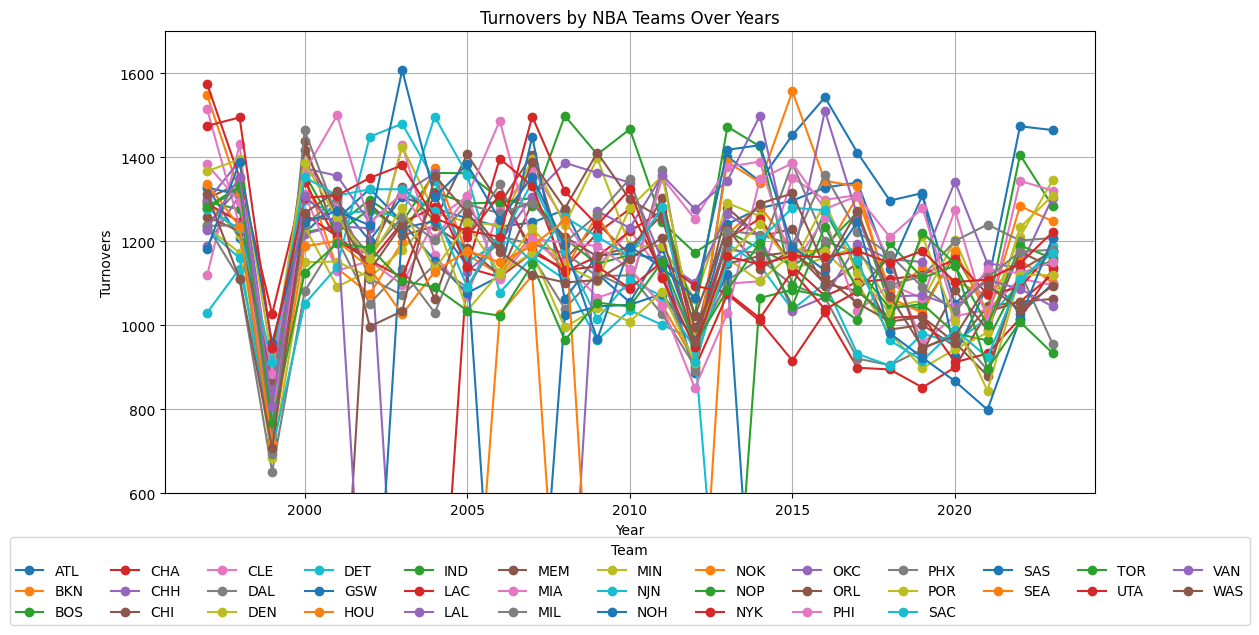

In [8]:
# Filter to include only turnovers
turnovers_df = df_all[df_all['type'] == 'Turnover']

# Group by team and season, count turnovers
turnovers_count = turnovers_df.groupby(['team', 'season']).size().reset_index(name='turnovers')

# Pivot the DataFrame for plotting
pivot_table = turnovers_count.pivot(index='season', columns='team', values='turnovers').fillna(0)

pivot_table.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Turnovers by NBA Teams Over Years')
plt.xlabel('Year')
plt.ylabel('Turnovers')
plt.legend(title='Team', loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=13)
plt.grid(True)
plt.ylim(600, 1700)
# plt.tight_layout()
plt.show()

   team  avg_turnovers
3   CHA    1045.526316
7   DAL    1071.888889
21  NOK    1072.500000
32  TOR    1085.925926
20  NOH    1100.222222
9   DET    1102.592593
22  NOP    1103.100000
18  MIN    1120.481481
35  WAS    1134.777778
28  POR    1139.555556
31  SEA    1144.916667
23  NYK    1145.592593
15  MEM    1154.227273
17  MIL    1155.037037
4   CHH    1157.500000
19  NJN    1159.937500
25  ORL    1162.555556
13  LAC    1163.481481
29  SAC    1164.333333
1   BKN    1165.090909
6   CLE    1172.296296
5   CHI    1176.333333
30  SAS    1182.962963
34  VAN    1186.800000
27  PHX    1191.185185
0   ATL    1193.666667
12  IND    1193.814815
8   DEN    1194.555556
26  PHI    1204.074074
11  HOU    1207.740741
16  MIA    1210.111111
24  OKC    1221.800000
33  UTA    1226.370370
14  LAL    1228.518519
10  GSW    1237.555556
2   BOS    1238.518519


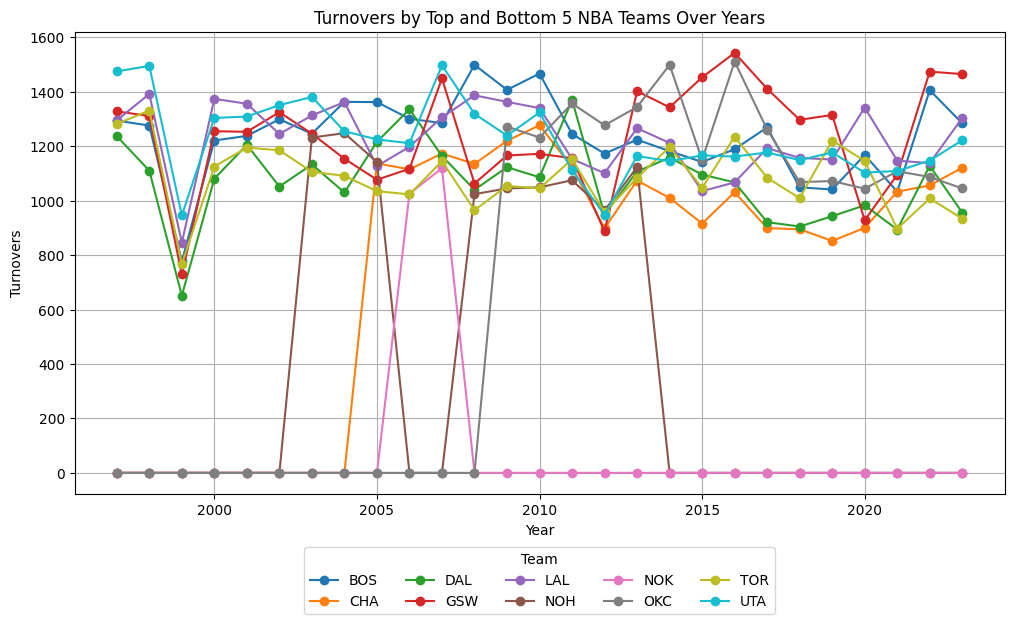

In [9]:
# Filter to include only turnovers
turnovers_df = df_all[df_all['type'] == 'Turnover']

# Group by team and season, count turnovers
turnovers_count = turnovers_df.groupby(['team', 'season']).size().reset_index(name='turnovers')

# Calculate average turnovers for each team
avg_turnovers = turnovers_count.groupby('team')['turnovers'].mean().reset_index(name='avg_turnovers')

# Sort teams based on average turnovers
avg_turnovers_sorted = avg_turnovers.sort_values(by='avg_turnovers')
print(avg_turnovers_sorted)

# Select top 5 and bottom 5 teams
top_5_teams = avg_turnovers_sorted.tail(5)
bottom_5_teams = avg_turnovers_sorted.head(5)

# Merge with original turnovers_count to get data for top and bottom 5 teams only
top_bottom_teams = pd.concat([top_5_teams, bottom_5_teams])
filtered_turnovers = pd.merge(turnovers_count, top_bottom_teams['team'], on='team')

# Pivot the DataFrame for plotting
pivot_table = filtered_turnovers.pivot(index='season', columns='team', values='turnovers').fillna(0)

# Plotting
pivot_table.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Turnovers by Top and Bottom 5 NBA Teams Over Years')
plt.xlabel('Year')
plt.ylabel('Turnovers')
plt.legend(title='Team', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
plt.grid(True)
# plt.show()